# 1. Introduction

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

# 2. Data Preparation
  ## 2.1 Load Data

In [11]:
train = pd.read_csv("/content/data/train.csv")
test = pd.read_csv("/content/data/test.csv")

In [12]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [13]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [14]:
# save the labels into a variable l.
l = train['label']

# Drop the label feature and store the pixel data in d.
d = train.drop("label",axis=1)

print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

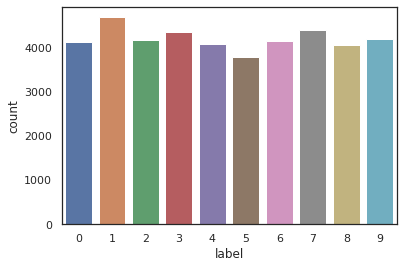

In [15]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

## 2.2 Check for null and missing values¶


In [16]:
# Check the data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [17]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

## 2.3 2D Visualization using PCA

In [18]:
# Pick first 15K data-points to work on for time-effeciency.
#Excercise: Perform the same analysis on all of 42K data-points.

labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)

the shape of sample data =  (15000, 784)


In [19]:
# Data-preprocessing: Standardizing the data
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [20]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [21]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.
#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.eigh.html

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783)(index) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [24]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print ("The resultant new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

The resultant new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [25]:
# appending label to the 2d projected data(vertical stack)
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())
#(0,1,2,3,4 are Xi other are principal axis)

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


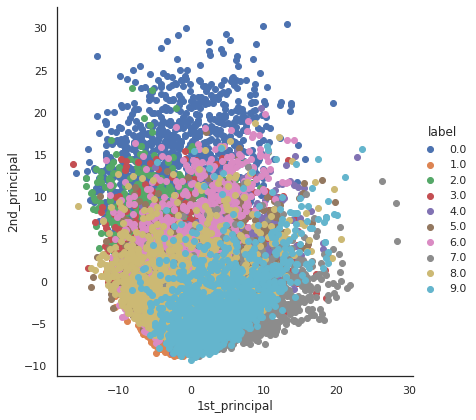

In [26]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## 2.4 PCA using scikit-learn

In [27]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [28]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


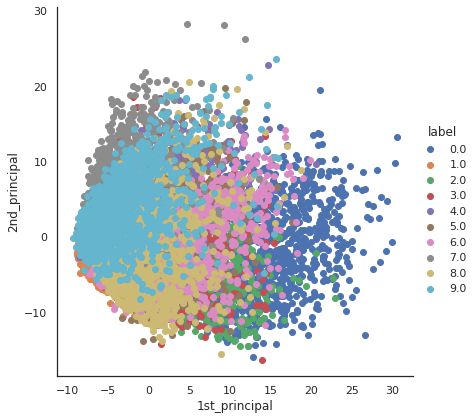

In [29]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## 2.5 PCA for dimensionality reduction

In [30]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

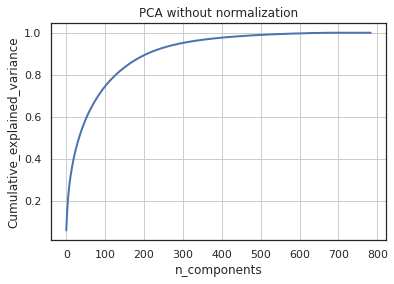

In [44]:
# PCA for dimensionality redcution (non-visualization) - (Non normalization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.title('PCA without normalization')
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

**Note:** If we take 200-dimensions, approx. 90% of variance is expalined.


## 2.6 PCA with Normalization

In [38]:
from sklearn.preprocessing import Normalizer

# Scaling Data with Normalizer
def norm(input_data):
    nm = Normalizer()
    nm.fit(input_data)
    input_data_scale = nm.transform(d)
    return input_data_scale, nm

featrue_scale, nm = norm(d)

In [39]:
from sklearn.decomposition import PCA

component_with_var = {}
# We will use variacne range instead  of number features. Looping 784 features is slower than 10 varince range.
variance_list = np.arange(0.1, 1.1, 0.1)

for var in variance_list:
    if var < 1.0:
        # Selecting 2nd shape value which is nothing but number of components.
        component_with_var[str(var*100)+' %'] = PCA(var).fit_transform(featrue_scale).shape[1]
    else:
        component_with_var[str(var*100)+' %'] = featrue_scale.shape[1]
component_with_var

{'10.0 %': 2,
 '20.0 %': 3,
 '30.000000000000004 %': 5,
 '40.0 %': 8,
 '50.0 %': 12,
 '60.0 %': 18,
 '70.0 %': 29,
 '80.0 %': 48,
 '90.0 %': 93,
 '100.0 %': 784}

In [40]:
variance_cover = 0.9    # 90% Of varince cover
# Get component list
component_list = list(component_with_var.values())
# using numpy interp function we will get number of features(components) for the 90% varince coverage.
components = int(np.interp(variance_cover, variance_list, component_list))
print("Optimum number of feature or component is {0}".format(components))

Optimum number of feature or component is 93


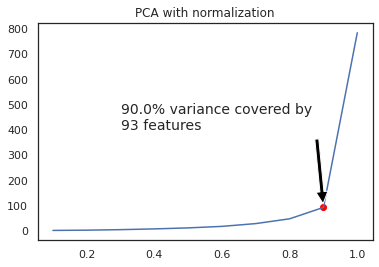

In [43]:
plt.plot(variance_list, component_list)
plt.scatter(variance_cover, components, color='red')
plt.title('PCA with normalization')
plt.annotate('{}% variance covered by \n{} features'.format(variance_cover*100,components), 
             xy=(variance_cover, components), xytext=(0.3,400),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=14
            )
plt.show()

In [42]:
# Lets reduce the dimension of given dataset
def pca_transform(input_data, components):
    pca = PCA(n_components=components)
    pca.fit(input_data)
    input_data_pca = pca.transform(input_data)
    return input_data_pca, pca
feature_pca, pca_model = pca_transform(featrue_scale, components)

## 2.7 Normalization

In [ ]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

## 2.8 Reshape

In [ ]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

## 2.9 Label Encoding

In [ ]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [ ]:
# Set the random seed
random_seed = 2

## 2.10 Split training and validation set

In [ ]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

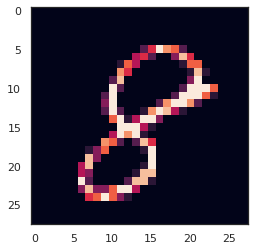

In [ ]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

# 3. CNN
## 3.1 Define the Model

In [ ]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

## 3.2 Set the optimizer

In [ ]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
epochs = 5 # Increase no.of epochs to get more accuracy
batch_size = 86

## 3.3 Data Augmentation

In [ ]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/5


439/439 - 302s - loss: 0.3951 - accuracy: 0.8742 - val_loss: 0.0702 - val_accuracy: 0.9779 - lr: 0.0010 - 302s/epoch - 688ms/step
Epoch 2/5


439/439 - 286s - loss: 0.1229 - accuracy: 0.9627 - val_loss: 0.0893 - val_accuracy: 0.9717 - lr: 0.0010 - 286s/epoch - 652ms/step
Epoch 3/5


439/439 - 286s - loss: 0.0929 - accuracy: 0.9725 - val_loss: 0.0387 - val_accuracy: 0.9881 - lr: 0.0010 - 286s/epoch - 651ms/step
Epoch 4/5


439/439 - 282s - loss: 0.0767 - accuracy: 0.9779 - val_loss: 0.0453 - val_accuracy: 0.9879 - lr: 0.0010 - 282s/epoch - 643ms/step
Epoch 5/5


439/439 - 281s - loss: 0.0704 - accuracy: 0.9796 - val_loss: 0.0219 - val_accuracy: 0.9931 - lr: 0.0010 - 281s/epoch - 641ms/step


# 4. Other Classifiers
## 4.1 Random forest Classifier

In [45]:
from sklearn.model_selection import train_test_split
# Train data 80%, Test data 20%
X_train, X_test, Y_train, Y_test = train_test_split(feature_pca, l, test_size=0.2)

In [46]:
# Calling Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Taking effective params 
rfr_grid = {
    "n_estimators":[100, 200],
    "max_depth":[2, 5, 10, None]
}

In [47]:
# Fitting model
clf = GridSearchCV(RandomForestClassifier(),param_grid=rfr_grid,verbose=5)
clf.fit(X_train, Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .....max_depth=2, n_estimators=100;, score=0.674 total time=   5.0s
[CV 2/5] END .....max_depth=2, n_estimators=100;, score=0.678 total time=   4.9s
[CV 3/5] END .....max_depth=2, n_estimators=100;, score=0.668 total time=   5.3s
[CV 4/5] END .....max_depth=2, n_estimators=100;, score=0.681 total time=   5.4s
[CV 5/5] END .....max_depth=2, n_estimators=100;, score=0.690 total time=   4.7s
[CV 1/5] END .....max_depth=2, n_estimators=200;, score=0.688 total time=  11.8s
[CV 2/5] END .....max_depth=2, n_estimators=200;, score=0.673 total time=  10.5s
[CV 3/5] END .....max_depth=2, n_estimators=200;, score=0.692 total time=  10.0s
[CV 4/5] END .....max_depth=2, n_estimators=200;, score=0.689 total time=   9.5s
[CV 5/5] END .....max_depth=2, n_estimators=200;, score=0.698 total time=   9.4s
[CV 1/5] END .....max_depth=5, n_estimators=100;, score=0.822 total time=  10.8s
[CV 2/5] END .....max_depth=5, n_estimators=100;,

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10, None],
                         'n_estimators': [100, 200]},
             verbose=5)

In [48]:
# Best params are
clf.best_params_

{'max_depth': None, 'n_estimators': 200}

In [49]:
%%time
# Fitting with best params
rfr = RandomForestClassifier(
    n_estimators=200
)
rfr.fit(X_train,Y_train)

CPU times: user 1min 7s, sys: 90.9 ms, total: 1min 7s
Wall time: 1min 7s


RandomForestClassifier(n_estimators=200)

In [50]:
# Train score
rfr.score(X_train,Y_train)

1.0

In [51]:
# ValidationTest Score
rfr.score(X_test, Y_test)

0.9520238095238095

# 5. Evaluate the model
## 5.1 Plot training and validation curves

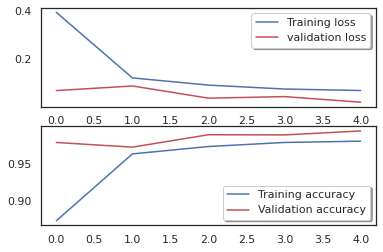

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## 5.2 Confusion Matrix

132/132 [==============================] - 8s 57ms/step


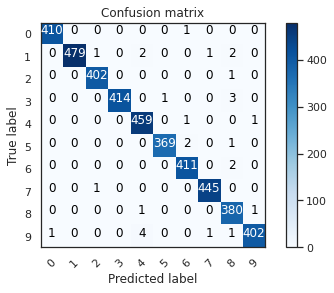

In [ ]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

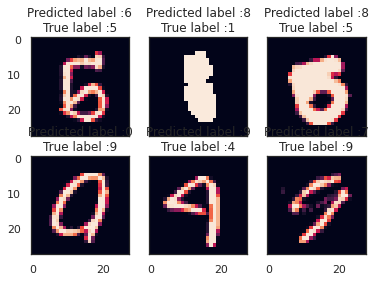

In [ ]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [ ]:
# predict results
results = model.predict(test)

# select the index with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 [==============================] - 55s 63ms/step


In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)